# EDA On Haberman's Survival Dataset

### Reference:
https://www.kaggle.com/gilsousa/habermans-survival-data-set

https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival

### Information about the Dataset
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

### Attribute Information
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute) -- 1 = the patient survived 5 years or longer -- 2 = the patient died within 5 year

## Objective:
To predict Whether a patient will survive 5 years or more after the operation based on age , year of operation and the number of positive axillary nodes.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
#Load Haberman dataset into a pandas dataframe
column = ['Age_of_Patient', 'Year_of_Operation', 'Positive_Axillary_Nodes', 'Survival_Status']
df = pd.read_csv("haberman.csv", names=column)
df.head()

,Age_of_Patient,Year_of_Operation,Positive_Axillary_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [21]:
#What are the column names or attributes in our dataset?
print(df.columns)

Index(['Age_of_Patient', 'Year_of_Operation', 'Positive_Axillary_Nodes',
       'Survival_Status'],
      dtype='object')


In [22]:
#Check how many data points and features/attributes are there?
print("Number of data points and attributes:",df.shape)

Number of data points and attributes: (306, 4)


In [23]:
#How many datapoints are present for each class?
df['Survival_Status'].value_counts()

1    225
2     81
Name: Survival_Status, dtype: int64

### Observation:
1. There are 2 classes 1 and 2. Class 1 corresponds to patients who survived 5 years or longer after the operation whereas Class 2 corresponds to patients who died within 5 years of operation.
2. Class 1 contains 225 values and Class 2 contains 81 values indicating that the dataset is imbalanced.

In [24]:
#getting the info about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age_of_Patient             306 non-null int64
Year_of_Operation          306 non-null int64
Positive_Axillary_Nodes    306 non-null int64
Survival_Status            306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB
None


#### Observations
1. No missing values in this dataset.
2. The type of 'status' column is integer which needs to converted into categorical.

Modify the target column i.e. Status into a meaningfule categorical column.

In [29]:
#The value of status column is in inetger which needs to changed into categorical values.
df['Survival_Status']= df['Survival_Status'].map({1:"yes",2:"no"})
df['Survival_Status']= df['Survival_Status'].astype('category')
print(df.head())

   Age_of_Patient  Year_of_Operation  Positive_Axillary_Nodes Survival_Status
0              30                 64                        1             yes
1              30                 62                        3             yes
2              30                 65                        0             yes
3              31                 59                        2             yes
4              31                 65                        4             yes


In [30]:
#getting the % of people save to died
print(df.iloc[:,-1].value_counts(normalize = True))

yes    0.735294
no     0.264706
Name: Survival_Status, dtype: float64


## High Level Statistics

In [31]:
print(df.describe())

       Age_of_Patient  Year_of_Operation  Positive_Axillary_Nodes
count      306.000000         306.000000               306.000000
mean        52.457516          62.852941                 4.026144
std         10.803452           3.249405                 7.189654
min         30.000000          58.000000                 0.000000
25%         44.000000          60.000000                 0.000000
50%         52.000000          63.000000                 1.000000
75%         60.750000          65.750000                 4.000000
max         83.000000          69.000000                52.000000


### Observations
1. The number of records in the dataset is 306.
2. The age of the patients vary between 30-83 years.
3. Although the maximum no. of positive lymph nodes observed is 52. However, naerly 75% of the patients have less than 5 lymph nodes and nearly 25% of the patients have no lymph nodes.
4. The status column is imbalanced with 73% indicating saved.

In [39]:
df_survived = df.loc[df["Survival_Status"] == 'yes']
df_died = df.loc[df["Survival_Status"] == 'no']

print("Statistics of Patients who survived 5 years or more after the operation")
df_survived.describe()

Statistics of Patients who survived 5 years or more after the operation


,Age_of_Patient,Year_of_Operation,Positive_Axillary_Nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [40]:
print("Basic statistics about patients who died within 5 years of operation")
df_died.describe()

Basic statistics about patients who died within 5 years of operation


,Age_of_Patient,Year_of_Operation,Positive_Axillary_Nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


## Observations:
1. The statistics about age and year of operation of both the classes are almost similar , the only parameter which varies marginally is the number of positive axillary nodes.
2. About 75% of survived patients had positive axillary nodes less than or equal to 3 and 75% of patients who died had positive axillary nodes less than or equal to 11 .Thus the parameter which varies the most in the above statistics is the number of positive axillary nodes. The patient with less number of positive axillary nodes has higher chance of survival.
3. Number of positive axillary nodes alone is not suitable in determining the survival of patient as there are cases where the patient died within 5 years of operation even when she had no positive axillary nodes(minimum number of postivie axillary nodes for died patient is 0)

## Univariate Analysis Based on Different Features

### 1. Age_of_Patient
#### 1.1 Histogram with PDF

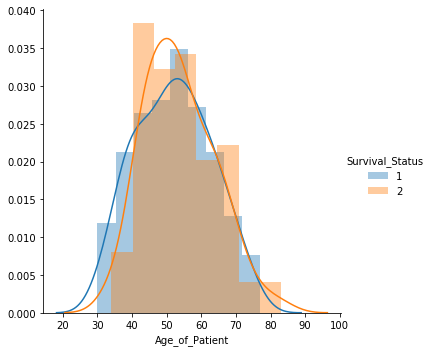

In [42]:
sns.FacetGrid(df, hue="Survival_Status", height=5) \
   .map(sns.distplot, "Age_of_Patient") \
   .add_legend()
plt.show()

### 1.2 PDF and CDF Plot

[0.02222222 0.03111111 0.04444444 0.06222222 0.04444444 0.08
 0.04       0.05333333 0.09777778 0.06666667 0.07555556 0.08888889
 0.04888889 0.04444444 0.08       0.03111111 0.02222222 0.04
 0.01333333 0.01333333]
[30.   32.35 34.7  37.05 39.4  41.75 44.1  46.45 48.8  51.15 53.5  55.85
 58.2  60.55 62.9  65.25 67.6  69.95 72.3  74.65 77.  ]
[0.02469136 0.01234568 0.04938272 0.07407407 0.12345679 0.07407407
 0.07407407 0.12345679 0.09876543 0.03703704 0.03703704 0.08641975
 0.04938272 0.04938272 0.03703704 0.01234568 0.01234568 0.01234568
 0.         0.01234568]
[34.   36.45 38.9  41.35 43.8  46.25 48.7  51.15 53.6  56.05 58.5  60.95
 63.4  65.85 68.3  70.75 73.2  75.65 78.1  80.55 83.  ]


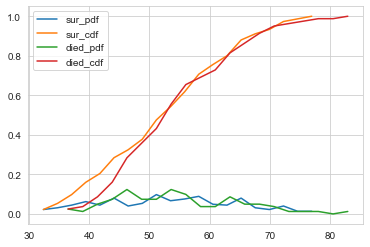

In [48]:
counts, bin_edges = np.histogram(df_survived['Age_of_Patient'], bins=20, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts, bin_edges = np.histogram(df_died['Age_of_Patient'], bins=20, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:] ,cdf)
plt.legend(['sur_pdf', 'sur_cdf','died_pdf', 'died_cdf'])

plt.show();

### 1.3 Box Plot

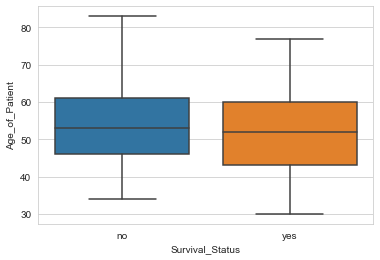

In [49]:
sns.boxplot(x='Survival_Status',y='Age_of_Patient', data=df)
plt.show()

### 1.4 Violin Plot

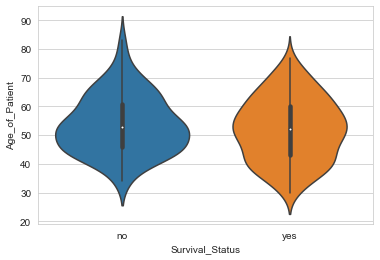

In [50]:
sns.violinplot(x='Survival_Status', y="Age_of_Patient", data=df)
plt.show()

## Observation:
1. Univariate analysis of'Age_of_Patient' gave similar plots for both the classes.
2. Huge overlap and thus unable to differentiate class based on the plots.
3. 'Age_of_Patient' alone is not an important parameter in determing the survival of the patient.

## 2. Year_of_Operation
### 2.1 Historam with PDF

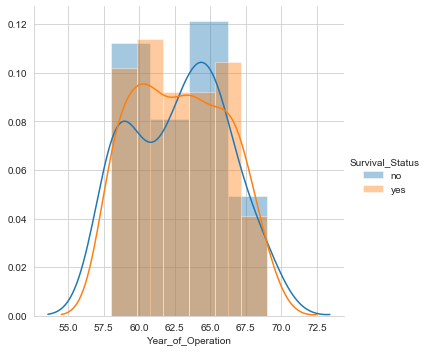

In [51]:
sns.FacetGrid(df, hue="Survival_Status", height=5) \
   .map(sns.distplot, "Year_of_Operation") \
   .add_legend()
plt.show()

### 2.2 PDF and CDF Plots

[0.10666667 0.         0.08       0.         0.         0.10666667
 0.         0.         0.10222222 0.         0.07111111 0.
 0.         0.09777778 0.         0.         0.10222222 0.
 0.         0.06666667 0.         0.09777778 0.         0.
 0.09333333 0.         0.         0.04444444 0.         0.03111111]
[58.         58.36666667 58.73333333 59.1        59.46666667 59.83333333
 60.2        60.56666667 60.93333333 61.3        61.66666667 62.03333333
 62.4        62.76666667 63.13333333 63.5        63.86666667 64.23333333
 64.6        64.96666667 65.33333333 65.7        66.06666667 66.43333333
 66.8        67.16666667 67.53333333 67.9        68.26666667 68.63333333
 69.        ]
[0.14814815 0.         0.11111111 0.         0.         0.04938272
 0.         0.         0.03703704 0.         0.08641975 0.
 0.         0.09876543 0.         0.         0.09876543 0.
 0.         0.16049383 0.         0.07407407 0.         0.
 0.04938272 0.         0.         0.03703704 0.         0.0493827

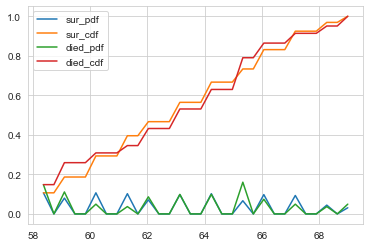

In [53]:
counts, bin_edges = np.histogram(df_survived['Year_of_Operation'], bins= 30, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts, bin_edges = np.histogram(df_died['Year_of_Operation'], bins=30, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:] ,cdf)
plt.legend(['sur_pdf', 'sur_cdf','died_pdf', 'died_cdf'])

plt.show();

### 2.3 Box Plot

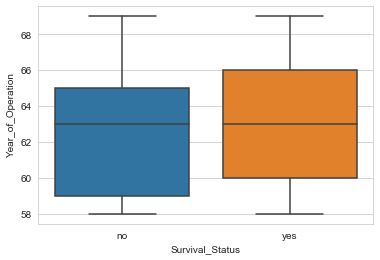

In [54]:
sns.boxplot(x='Survival_Status',y='Year_of_Operation', data=df)
plt.show()

### 2.4 Violin Plot

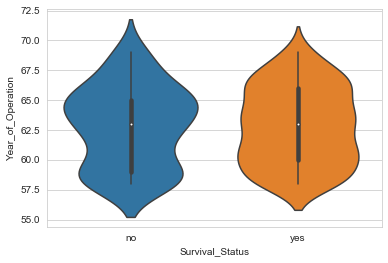

In [55]:
sns.violinplot(x='Survival_Status',y='Year_of_Operation', data=df)
plt.show()

## Observation:
1. univariate analysis based on Year_of_operation gives similar plots for both class with substantial overlap of data points.
2. Year_of_Operation is not an important feature for determining survival of a patient

## 3. Positive Axillary Nodes
### 3.1 Histogram with PDF

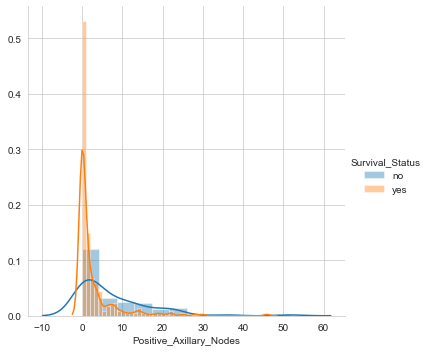

In [57]:
sns.FacetGrid(df, hue="Survival_Status", height=5) \
   .map(sns.distplot, "Positive_Axillary_Nodes") \
   .add_legend()
plt.show()

### 3.2 PDF and CDF Plots

[0.66666667 0.12444444 0.04444444 0.02666667 0.02222222 0.03111111
 0.00888889 0.00888889 0.00444444 0.01777778 0.00444444 0.00444444
 0.00444444 0.00444444 0.00888889 0.         0.00444444 0.
 0.00444444 0.00444444 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00444444]
[ 0.          1.53333333  3.06666667  4.6         6.13333333  7.66666667
  9.2        10.73333333 12.26666667 13.8        15.33333333 16.86666667
 18.4        19.93333333 21.46666667 23.         24.53333333 26.06666667
 27.6        29.13333333 30.66666667 32.2        33.73333333 35.26666667
 36.8        38.33333333 39.86666667 41.4        42.93333333 44.46666667
 46.        ]
[0.33333333 0.14814815 0.08641975 0.03703704 0.04938272 0.0617284
 0.04938272 0.04938272 0.03703704 0.01234568 0.02469136 0.01234568
 0.02469136 0.04938272 0.         0.         0.         0.
 0.         0.         0.01234568 0.         0.         0.
 0.         0.         0.         0.         0.   

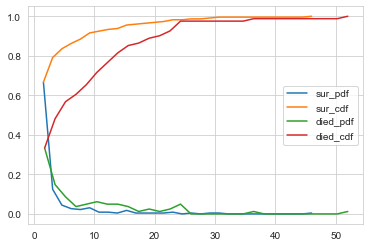

In [58]:
counts, bin_edges = np.histogram(df_survived['Positive_Axillary_Nodes'], bins= 30, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts, bin_edges = np.histogram(df_died['Positive_Axillary_Nodes'], bins=30, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:] ,cdf)
plt.legend(['sur_pdf', 'sur_cdf','died_pdf', 'died_cdf'])

plt.show();

### 3.3 Box Plot

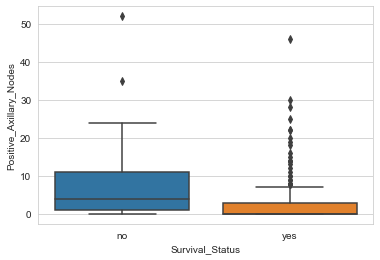

In [59]:
sns.boxplot(x='Survival_Status', y='Positive_Axillary_Nodes', data=df)
plt.show()

### 3.4 Violin Plot

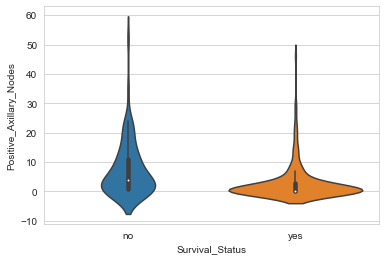

In [60]:
sns.violinplot(x='Survival_Status', y='Positive_Axillary_Nodes', data=df)
plt.show()

## Observation:
1. overlap of data points is less compared to other features, but overlap still exist thus it is difficult to set a threshold for positive axillary nodes which will differentiate both class of patients.
2. About 50% of the patients who survived had no positive axillary nodes.
3. As number of positive axillary nodes increase the chance of survival decreases.
4. small percentage of patients who had no positive axillary nodes died within 5 years of operation , thus absence of positive axillary nodes cannot always guarente survival.

## Bivariate Analysis
### Pair Plot

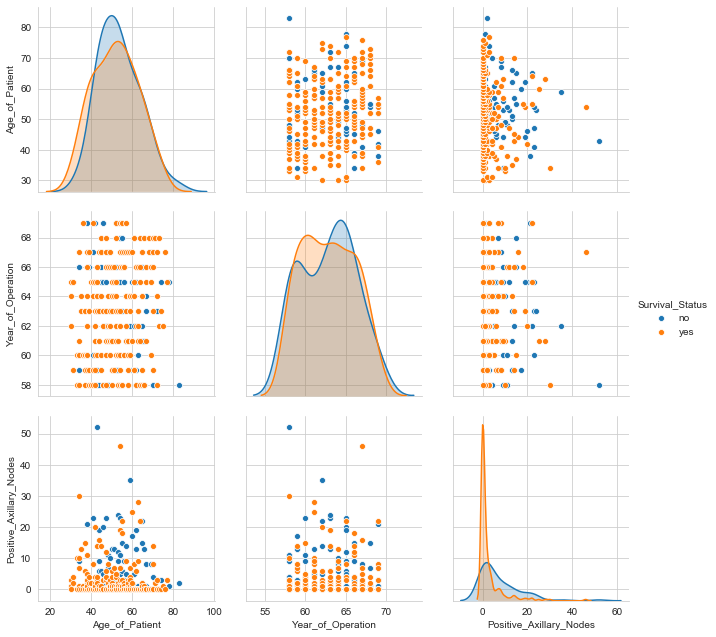

In [61]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="Survival_Status", height=3);
plt.show()

## Observation:
1. Axillary nodes doesn't depend on patient's age.
2. It is difficult to classify a patient based on his features.

# Multivariate Plots
### Contour Plot

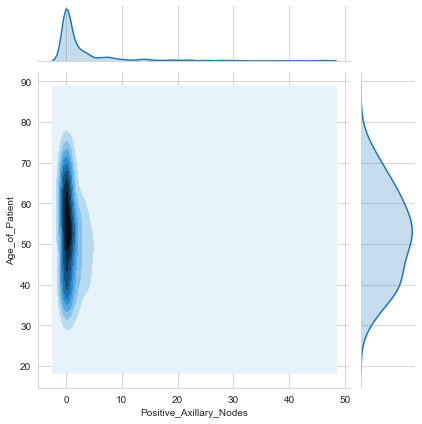

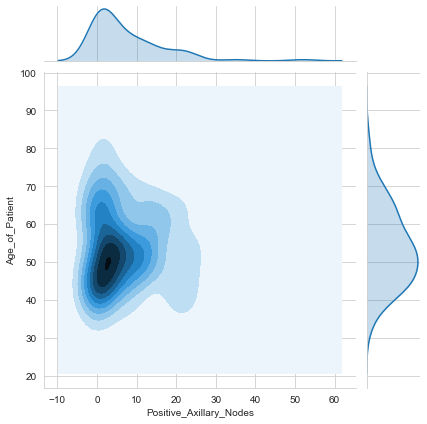

In [62]:
sns.jointplot(x="Positive_Axillary_Nodes", y="Age_of_Patient", data = df_survived , kind="kde");
plt.show()

sns.jointplot(x="Positive_Axillary_Nodes", y="Age_of_Patient", data = df_died , kind="kde");
plt.show()

## Observation:
1. No dependency between Age of the patient and Axillary Nodes.

# Conclusion
1. Patient's Age or Year of operation are not deciding factors for his/her survival.
2. As the number of positive axillary nodes increase the chance of survival of patient decrease at the same time having zero postivie axillary nodes doesn't guarentee survival as there are cases where patients with zero positive axillary nodes couldn't survive 5 years from the time of operation.
3. Even if we could come up with a simple model which could predict the survival of a patient based on the insights we got , the chance of misclassification is high.
4. he objective of classifying the survival status of a new patient based on given features is a difficuilt task.